In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

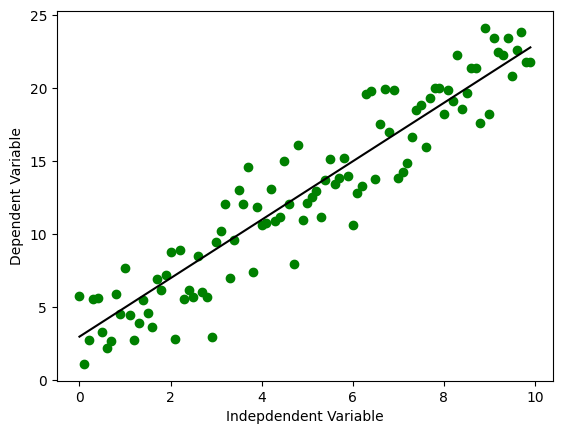

In [24]:
x = np.arange(0, 10, 0.1)

y =  2 * x + 3 
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'go')
plt.plot(x,y, 'k')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

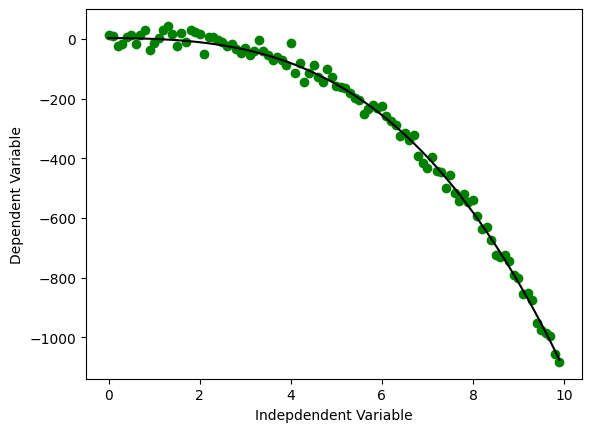

In [28]:
y = - 1 * (x ** 3) - 1 * (x ** 2) - 1 * x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'go')
plt.plot(x,y, 'k')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

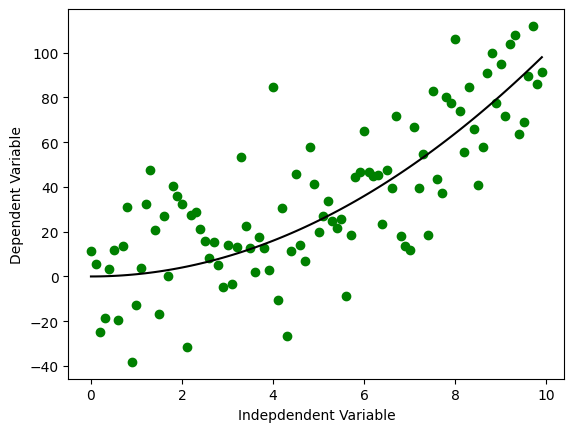

In [29]:
y = np.power(x,2)
ydata = y + y_noise
plt.plot(x, ydata, 'go')
plt.plot(x,y, 'k')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

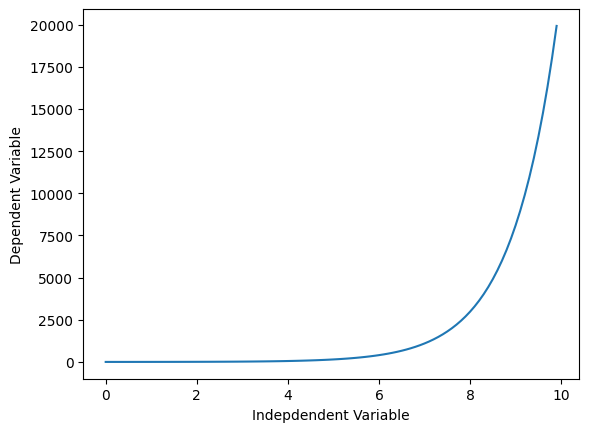

In [30]:
y = np.exp(x)

plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_28776\1264850559.py:1: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


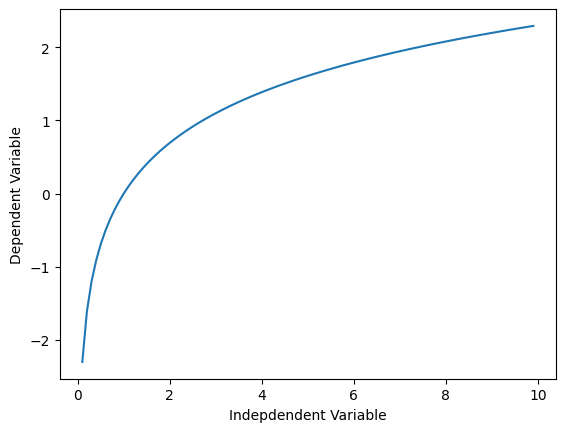

In [31]:
y = np.log(x)

plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

##### Sigmoidal

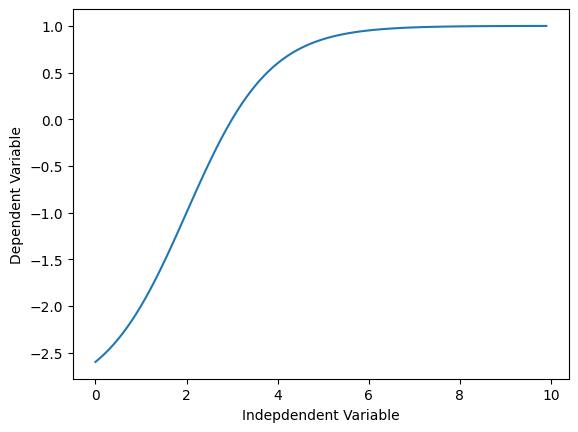

In [33]:
y = 1-4/(1+np.power(3, x-2))

plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta _1(X-\beta _2)}}$$

$\beta _1$: Controls the curve's steepness,

$\beta _2$: Slides the curve on the x-axis.


In [40]:
from fetch_request import download

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv'
await download(path, 'china_gdp.csv')

In [38]:
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv('data/china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


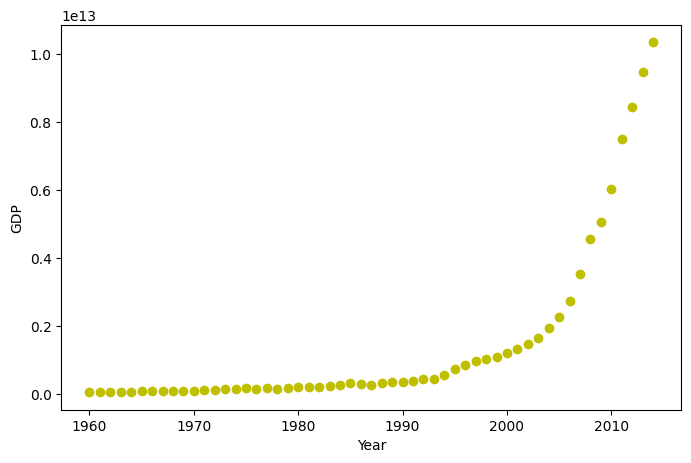

In [45]:
plt.figure(figsize=(8,5))
x, y = df['Year'].values, df['Value'].values
plt.plot(x, y, 'yo')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [46]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

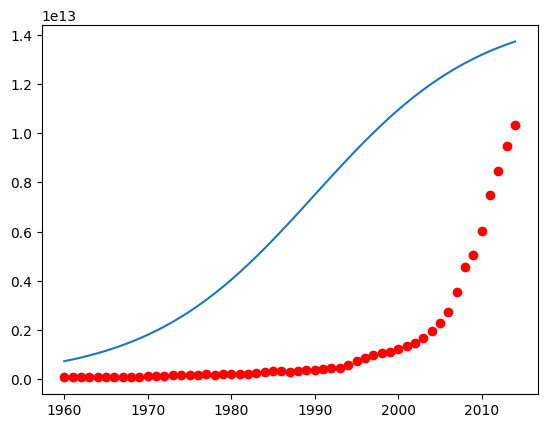

In [48]:
b_1 = 0.10
b_2 = 1990.0

y_hat = sigmoid(x, b_1, b_2)

plt.plot(x, y_hat*15000000000000.)
plt.plot(x, y, 'ro')

#### Normalize

In [49]:
xdata = x/max(x)
ydata = y/max(y)

In [50]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(f'beta_1 = {popt[0]}, beta_2 = {popt[1]}')

beta_1 = 690.4517118227653, beta_2 = 0.9972071272524615


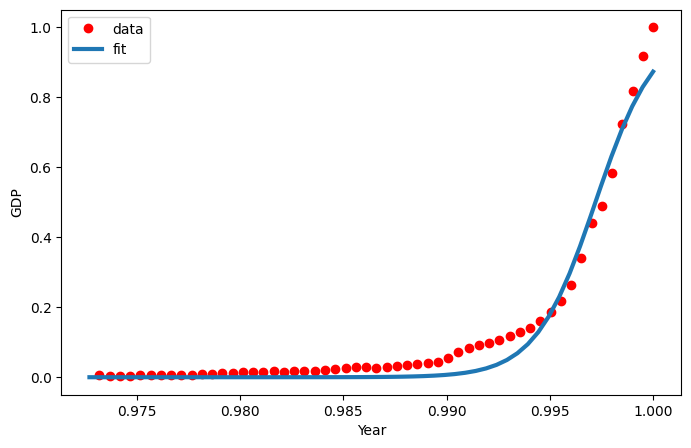

In [53]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)

plt.figure(figsize=(8,5))
y_hat = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y_hat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [66]:
from sklearn.metrics import r2_score

msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.97
